In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score # to check the accuracy of the model
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

Data Collection 

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0              6      148             72             35        0  33.6  \
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

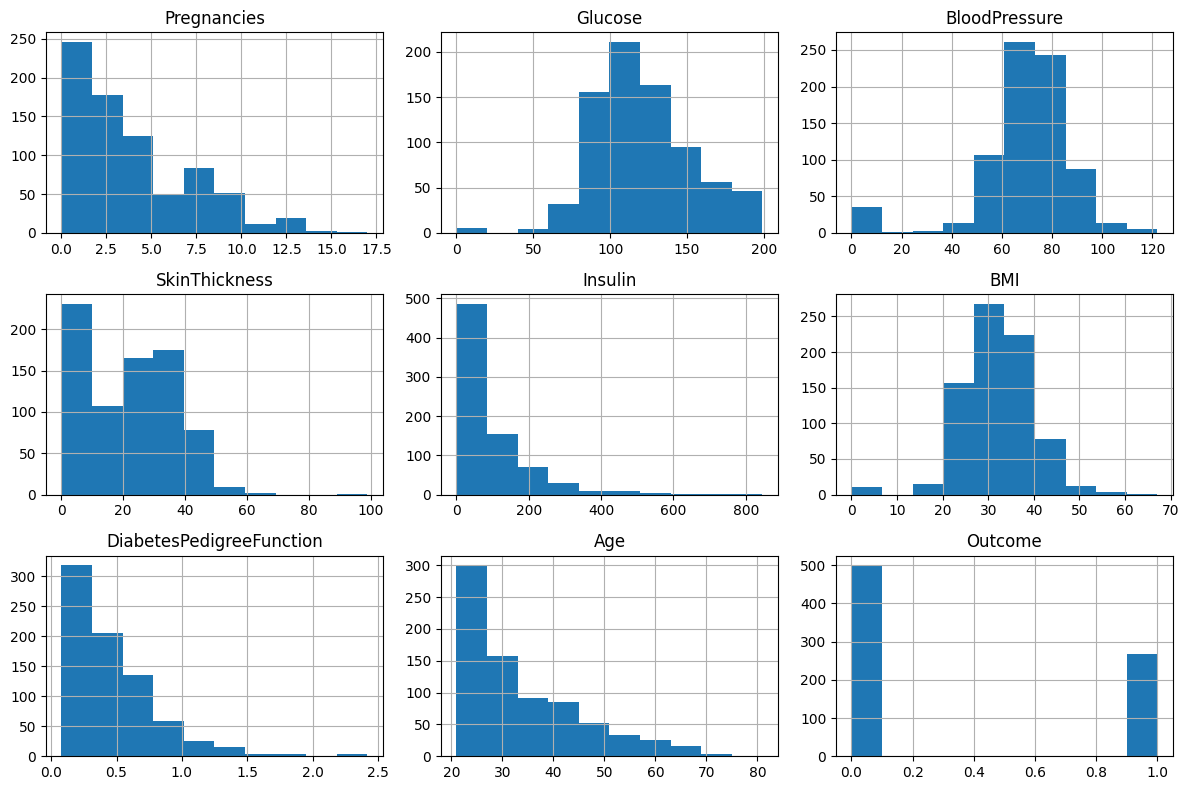

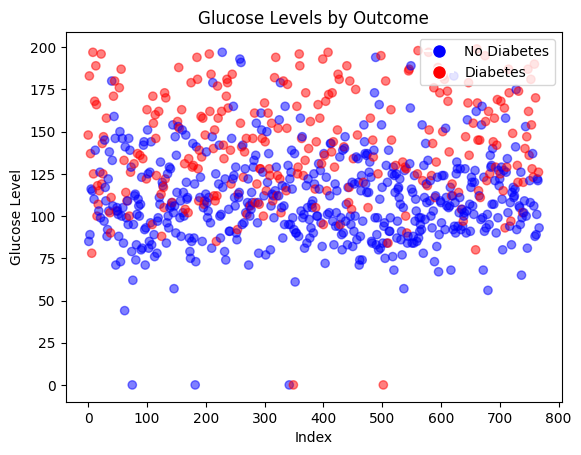

In [5]:
df = pd.read_csv("dataset/diabetes.csv")
print(df)
df.hist(figsize=(12, 8))
plt.tight_layout()  
plt.show()


# Outcomes based on plt.figure(figsize=(8, 6))
colors = {0: 'blue', 1: 'red'}
plt.scatter(df.index, df['Glucose'], c=df['Outcome'].map(colors), alpha=0.5)
plt.title('Glucose Levels by Outcome')
plt.xlabel('Index')
plt.ylabel('Glucose Level')
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Diabetes'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Diabetes')]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()

In [6]:
# Shape of dataset
df.shape

(768, 9)

In [7]:
# Statistical measures of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
print(df['Pregnancies'].value_counts())
df["Outcome"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64


Outcome
0    500
1    268
Name: count, dtype: int64

0 -> Non-Diabetic People

1 -> Diabetic People

In [9]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
# Seperating the data and labels

# X is the data which contains all the columns except the "Outcome" column 
# because we are trying to predict the outcome based on the other columns
X = df.drop(columns = "Outcome", axis = 1)

# Y is the label which contains the "Outcome" column, which is the column we are trying to predict
Y = df["Outcome"]

print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0              6      148             72             35        0  33.6  \
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Data Standardization

In [11]:
# We need to scale the data in order to make the data uniform
scaler = StandardScaler()

# Fit the data to the scaler
scaler.fit(X)

# Transform the data
standardized_data = scaler.transform(X)
